Student Name:Rojan Shrestha
Student ID:2408474

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks/final"

/content/drive/MyDrive/Colab Notebooks/final


In [4]:
!ls


 Alzheimer_cleaned_dataset.csv	     'House Price Prediction Dataset.csv'
 alzheimers_disease_data.csv	     'Kenya Malaria_Prediction Dataset by who.csv'
 ClassificationFInalest.ipynb	      Malria_cleaned_dataset.csv
 cleantedWaterQuality_dataset.csv     ParisHousing.csv
'Copy of Housing Price Dataset.csv'   RegressionFinalest.ipynb
'Copy of regression.ipynb'	      RegressionFinal.ipynb
 datacleanedparis.csv		      waterQuality1.csv


IMporting Libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


The "Paris Housing Price Prediction" dataset is available on Kaggle. The specific creation date and creator's name are not provided in the available information.

This dataset aligns with the United Nations Sustainable Development Goal (UNSDG) 11: Sustainable Cities and Communities, as it can be utilized to analyze housing affordability and inform urban planning in Paris.

The dataset contains the following attributes (columns):

squareMeters: Size of the house in square meters.

numberOfRooms: Total number of rooms in the house.

floors: Number of floors in the building.

cityCode: Code representing the city.

cityPartRange: Range indicating the part of the city.

numPrevOwners: Number of previous owners of the house.

made: Year the house was built.

isNewBuilt: Indicates if the house is newly built (Boolean).

hasStormProtector: Indicates if the house has storm protection (Boolean).

basement: Size of the basement in square meters.

attic: Size of the attic in square meters.

garage: Size of the garage in square meters.

hasStorageRoom: Indicates if the house has a storage room (Boolean).

hasGuestRoom: Indicates if the house has a guest room (Boolean).

category: Category of the house.

PoolAndYard: Combined size of the pool and yard in square meters.

Price: Price of the house (target variable)


In [6]:
df = pd.read_csv('ParisHousing.csv')
print("Data read sucessfully")


Data read sucessfully


In [7]:
df.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

Get the first 5 rows of the dataset


In [9]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

,0
squareMeters,0.0
numberOfRooms,0.0
hasYard,0.0
hasPool,0.0
floors,0.0
cityCode,0.0
cityPartRange,0.0
numPrevOwners,0.0
made,0.0
isNewBuilt,0.0


In [ ]:
#not in use
df = df.drop('cityCode', axis=1)

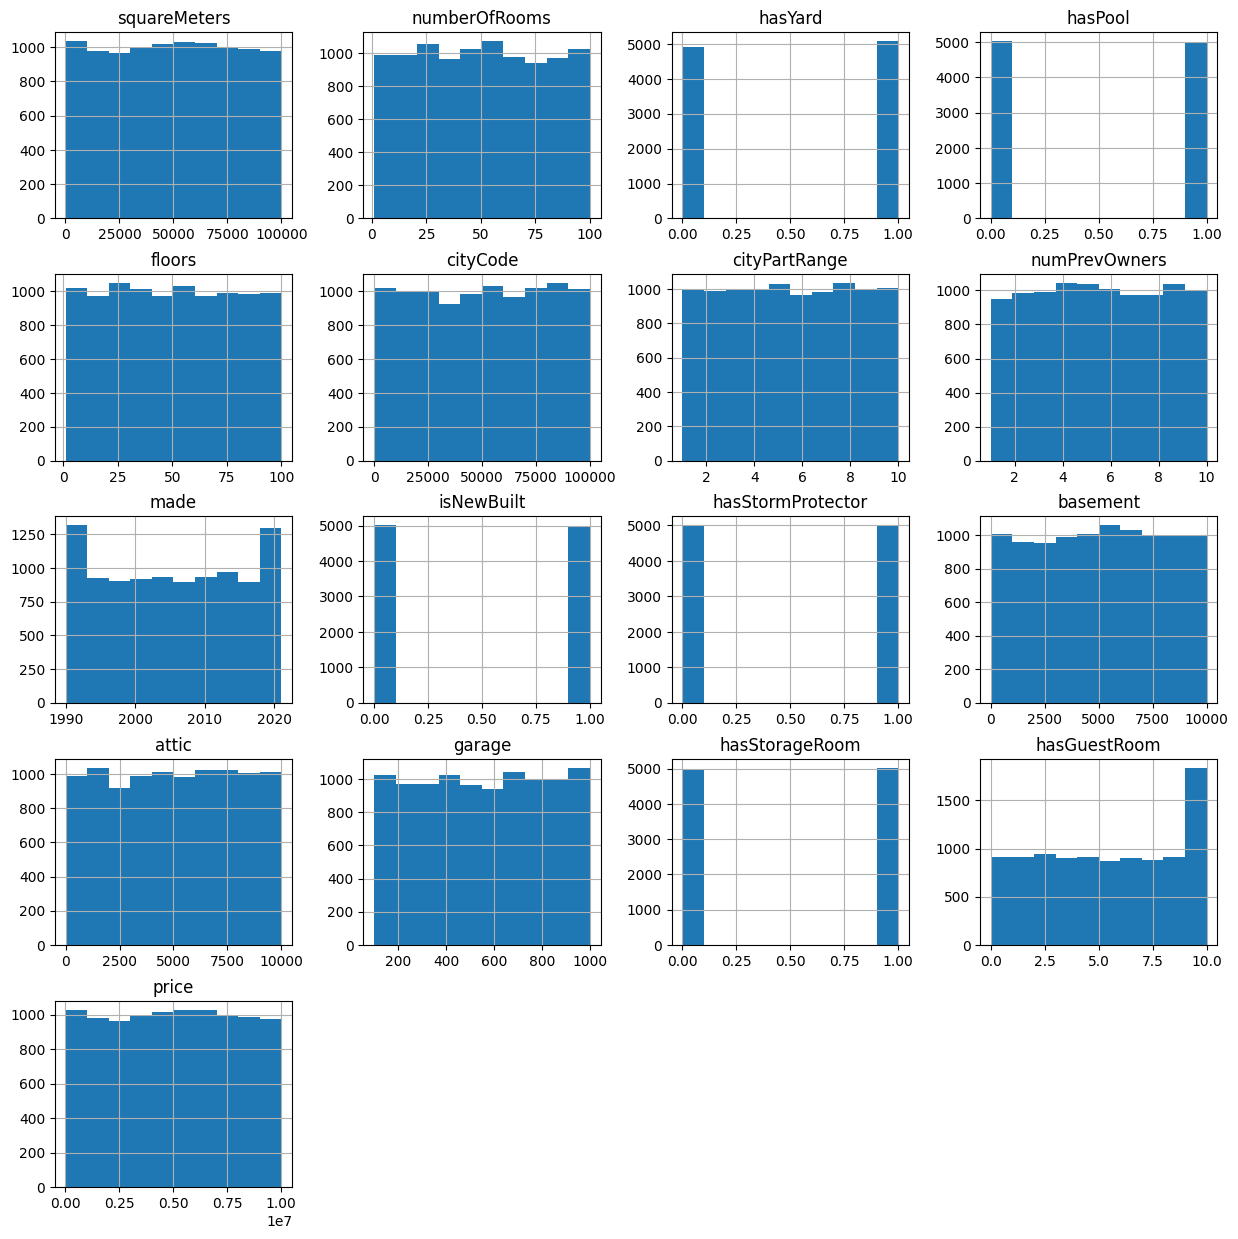

In [10]:
df.hist(figsize=(15,15))
plt.show()

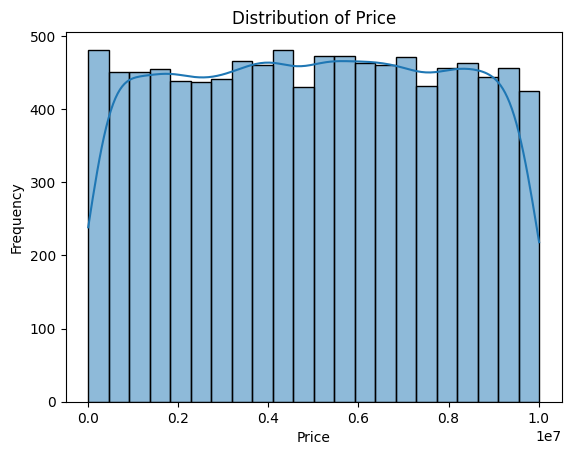

In [ ]:
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

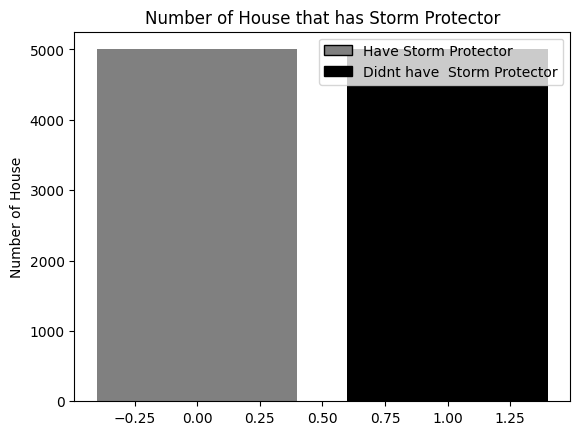

In [11]:
plt.bar(df['hasStormProtector'].value_counts().index,df['hasStormProtector'].value_counts().values,color=['grey','k'])
plt.title('Number of House that has Storm Protector')
plt.ylabel('Number of House')

handles = [plt.Rectangle((0,0),1,1, color=c,ec="k") for c in ['grey', 'k']]
labels= ['Have Storm Protector ','Didnt have  Storm Protector']
plt.legend(handles, labels)

plt.show()

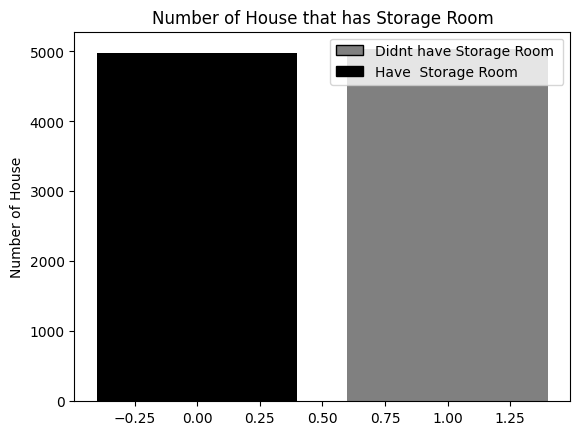

In [12]:
plt.bar(df['hasStorageRoom'].value_counts().index,df['hasStorageRoom'].value_counts().values,color=['grey','k'])
plt.title('Number of House that has Storage Room')
plt.ylabel('Number of House')

handles = [plt.Rectangle((0,0),1,1, color=c,ec="k") for c in ['grey', 'k']]
labels= ['Didnt have Storage Room ','Have  Storage Room']
plt.legend(handles, labels)

plt.show()

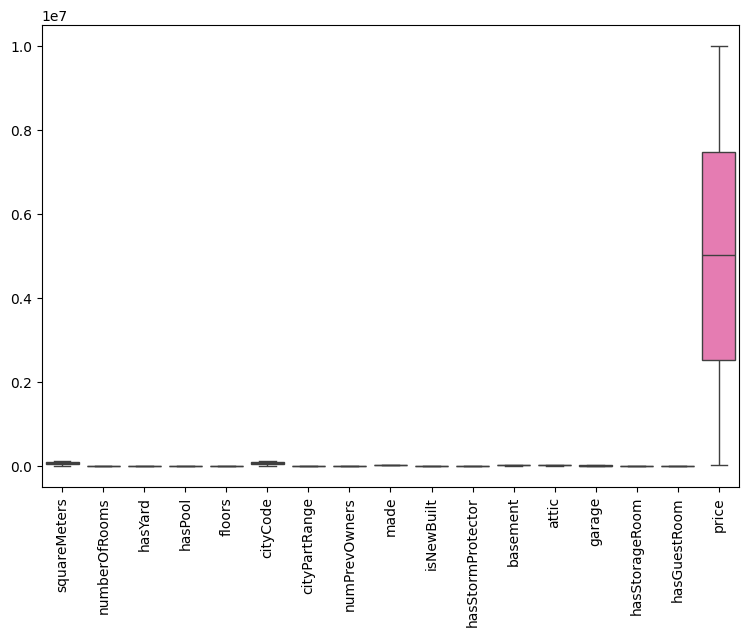

In [13]:
plt.figure(figsize=(9,6))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [14]:
#corrrelation of dataset
c=df.corr()
c

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


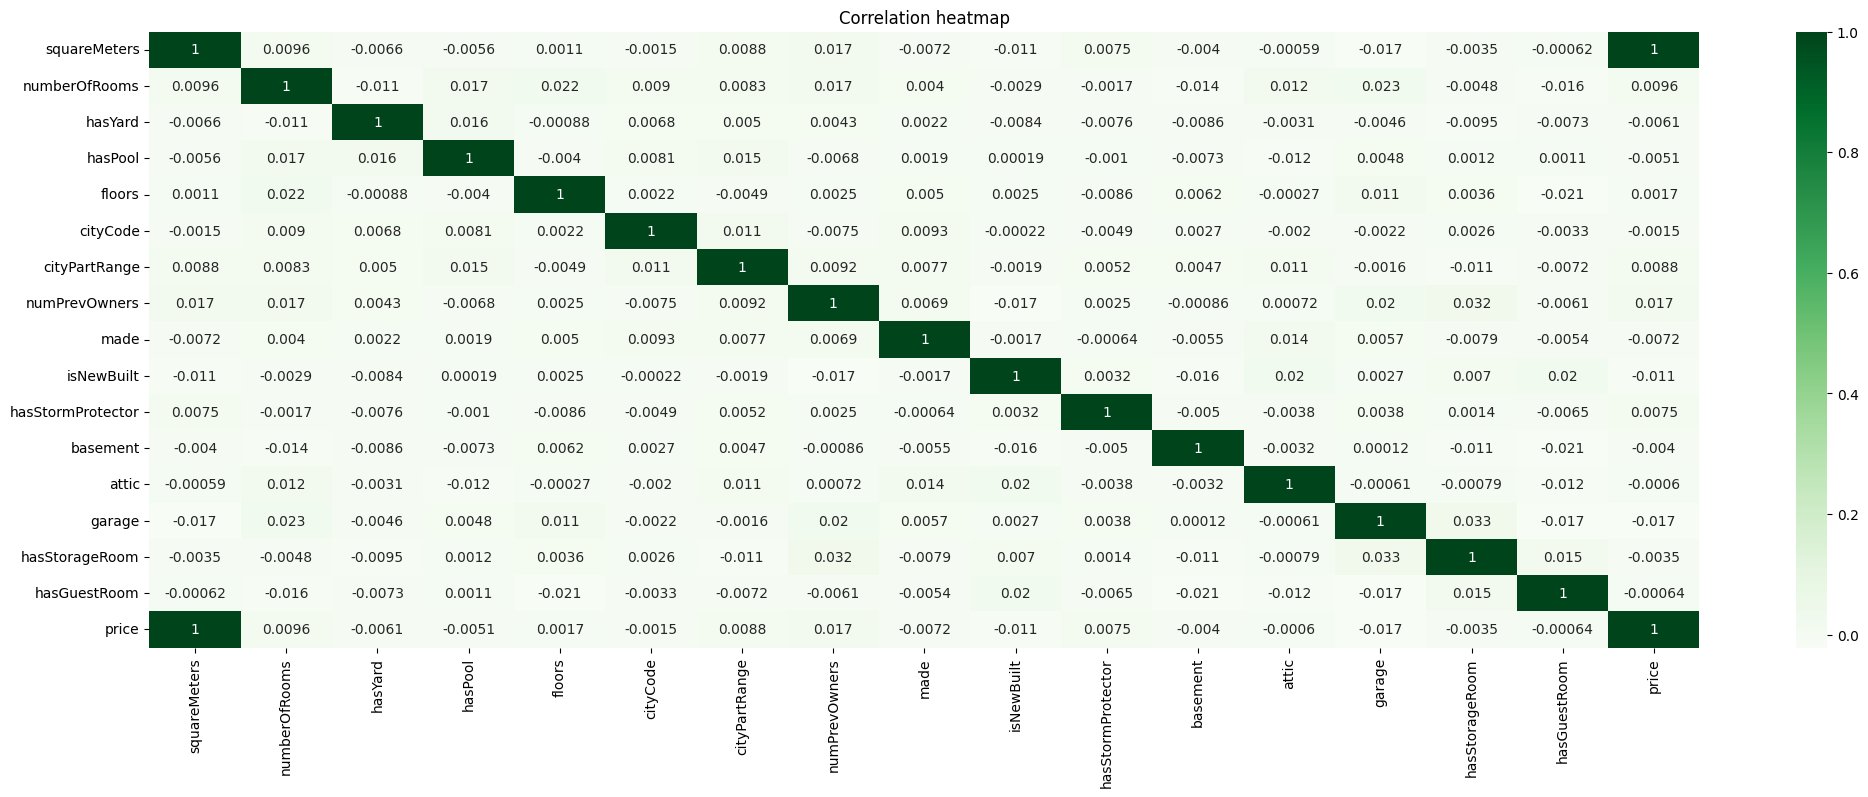

In [ ]:
plt.figure(figsize=(25,8))
sns.heatmap(c,annot=True,cmap='Greens')
plt.title('Correlation heatmap')
plt.show()

The heatmap shows that most features in the dataset have weak or near-zero correlations, meaning they don't have strong linear relationships. There are no significant positive or negative correlations, except for a feature with itself (always 1.0). Some slight correlations exist, such as between square meters and price, but they are weak. The analysis suggests that the features are mostly independent, and deeper exploration with advanced methods might be needed to find meaningful relationships.

In [ ]:

# Calculate the IQR for each numeric column
numeric_cols = df.select_dtypes(include=np.number).columns
outliers_count = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers for the current column
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count[col] = len(outliers)


# Print the number of outliers for each column
for col, count in outliers_count.items():
    print(f"Number of outliers in column '{col}': {count}")

# Total number of outliers across all numeric columns
total_outliers = sum(outliers_count.values())
print(f"\nTotal number of outliers across all numeric columns: {total_outliers}")

Number of outliers in column 'squareMeters': 0
Number of outliers in column 'numberOfRooms': 0
Number of outliers in column 'hasYard': 0
Number of outliers in column 'hasPool': 0
Number of outliers in column 'floors': 0
Number of outliers in column 'cityPartRange': 0
Number of outliers in column 'numPrevOwners': 0
Number of outliers in column 'made': 0
Number of outliers in column 'isNewBuilt': 0
Number of outliers in column 'hasStormProtector': 0
Number of outliers in column 'basement': 0
Number of outliers in column 'attic': 0
Number of outliers in column 'garage': 0
Number of outliers in column 'hasStorageRoom': 0
Number of outliers in column 'hasGuestRoom': 0
Number of outliers in column 'price': 0

Total number of outliers across all numeric columns: 0


In [ ]:

# Handle outliers by replacing them with the bounds
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the bounds (with type casting)
    df.loc[df[col] < lower_bound, col] = int(lower_bound)  # Cast to int
    df.loc[df[col] > upper_bound, col] = int(upper_bound)

# Verify the changes (optional)
outliers_count_after_handling = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count_after_handling[col] = len(outliers)



In [16]:
df.to_csv('datacleanedparis.csv',index=False)

In [17]:
df=pd.read_csv('datacleanedparis.csv')

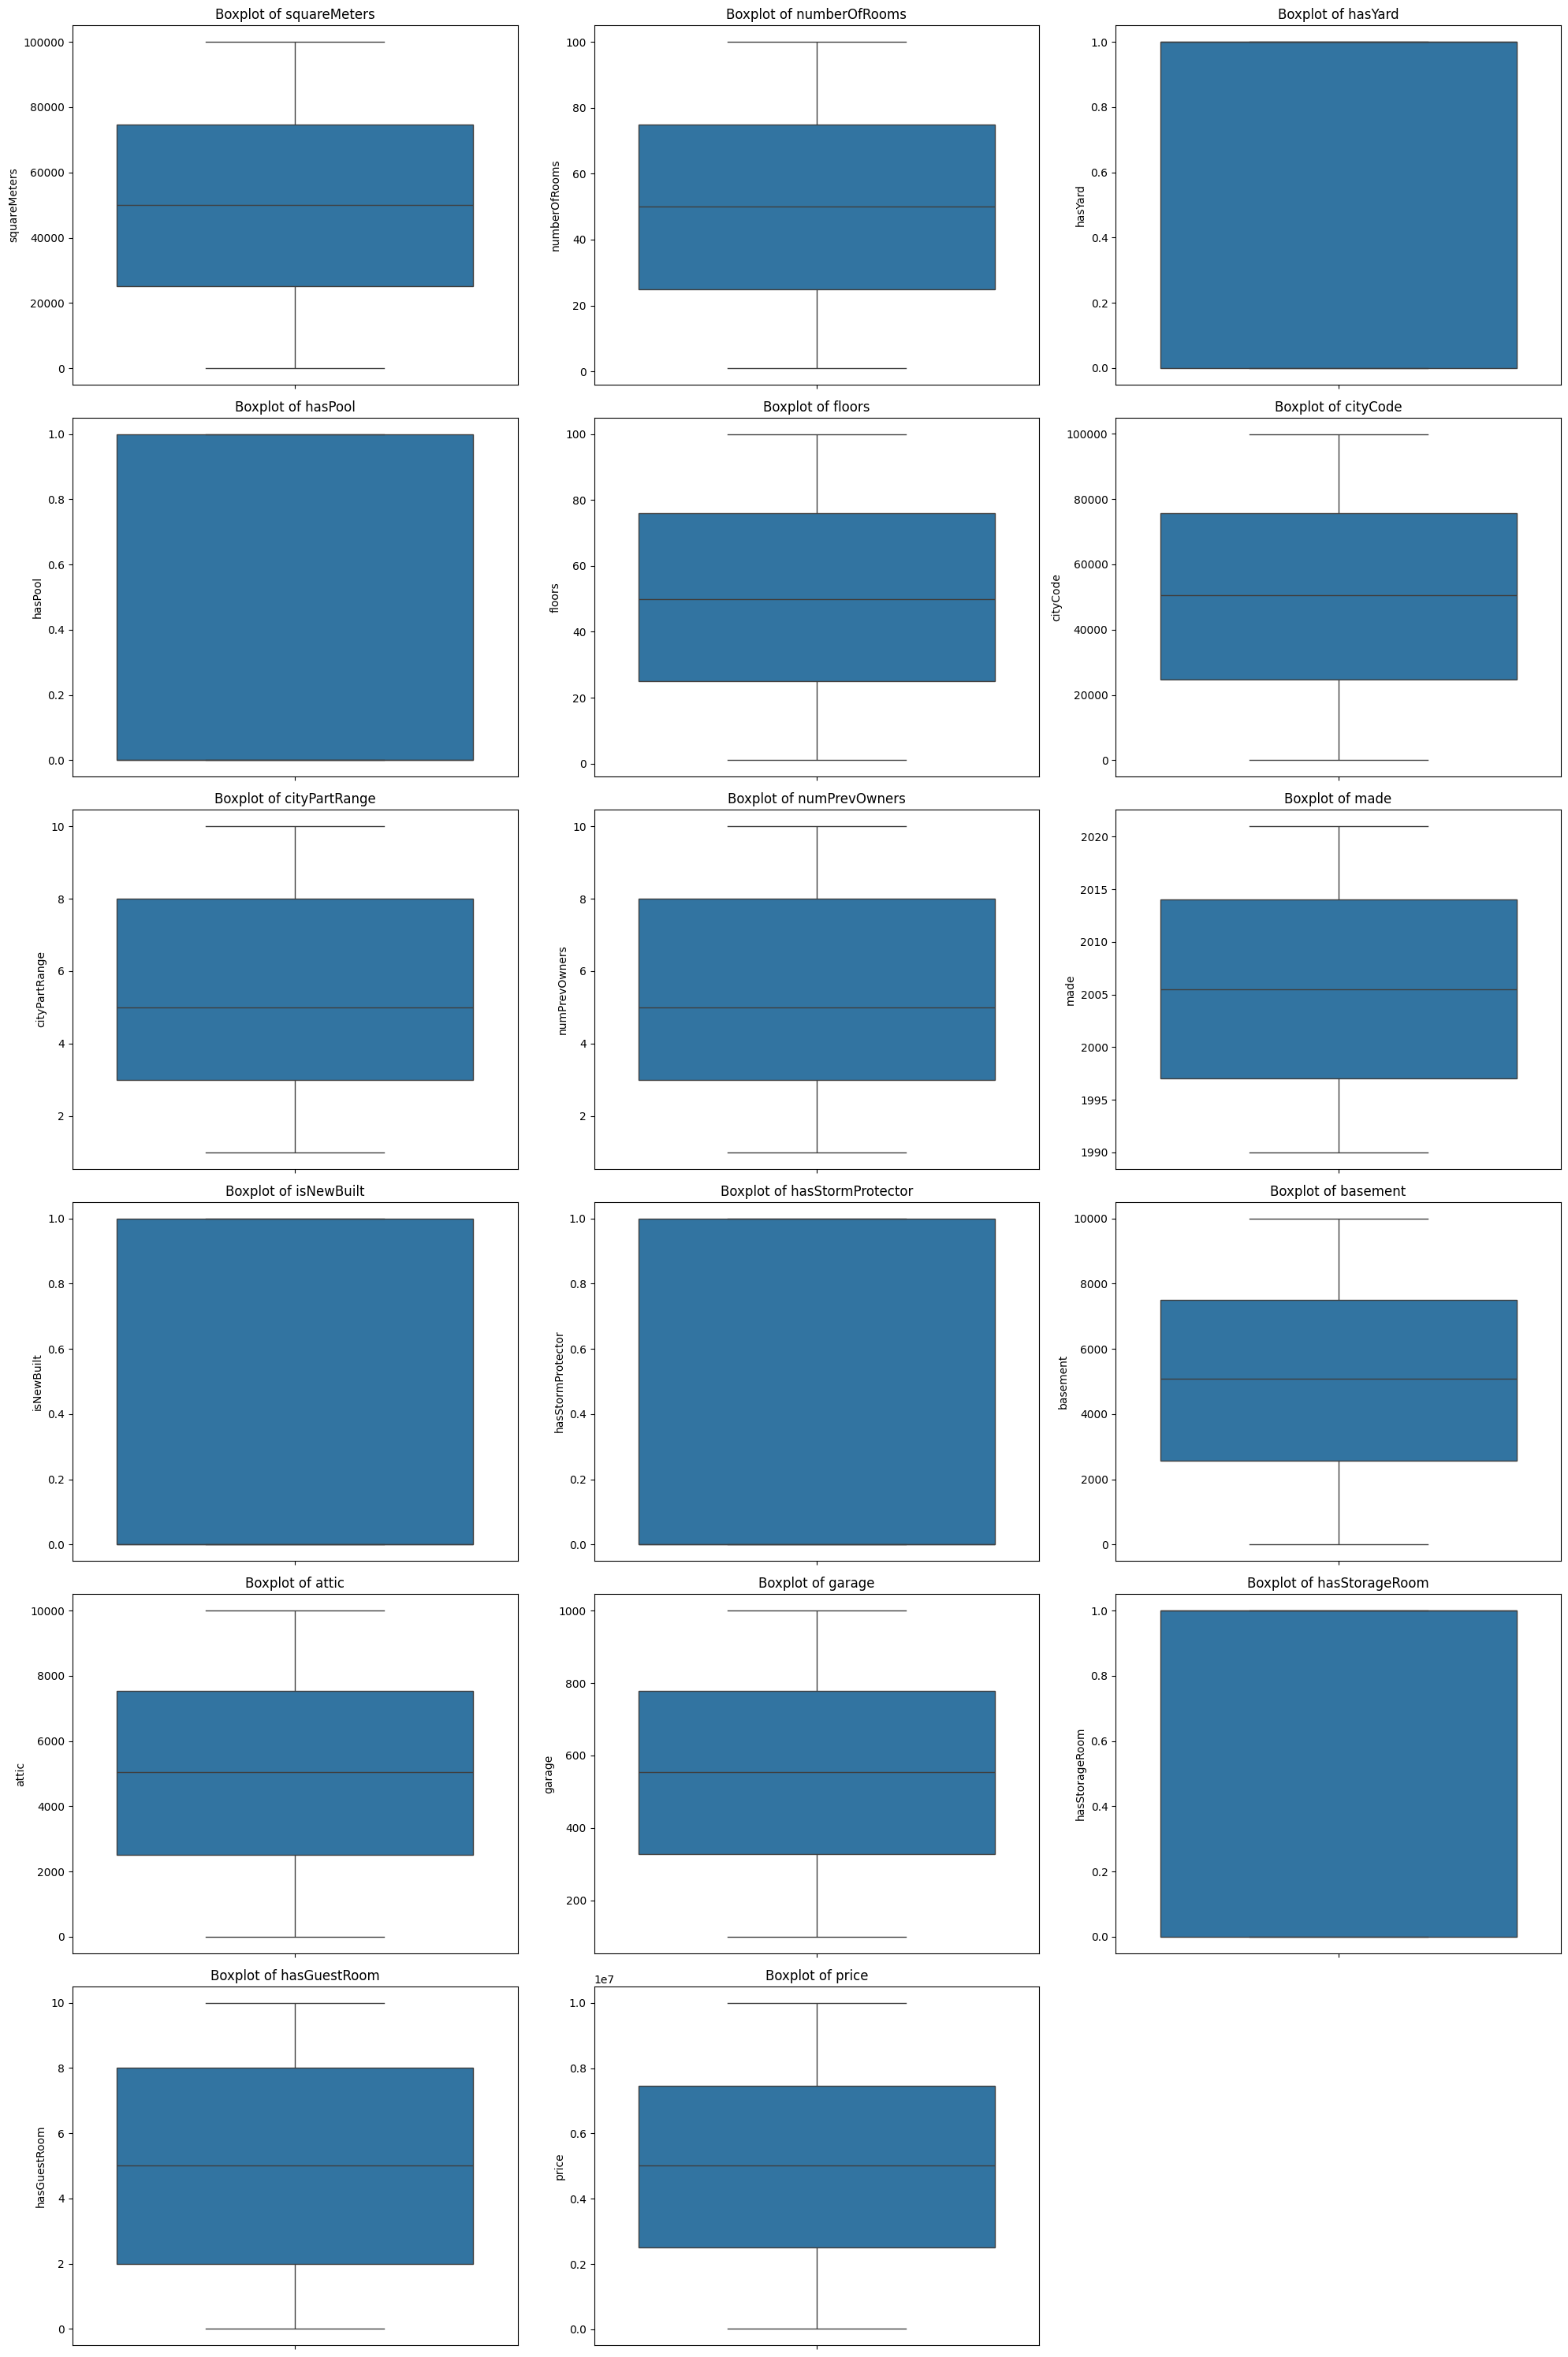

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=np.number).columns
num_plots = len(numeric_cols)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))


axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for i in range(num_plots, num_rows * num_cols):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
df["log_price"] = np.log(df["price"])

# Train the model using log-transformed price instead
y = df["log_price"]


In [ ]:
X = df.drop(columns=["price", "log_price"])  # Exclude target variables
y = df["log_price"]  # Use log-transformed price

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scartch model

Scratch Model Performance:
 Mean Squared Error (MSE): 0.24287817566544226
 Mean Absolute Error (MAE): 0.3324954225103513
 R-squared (R²): 0.7642716246945946


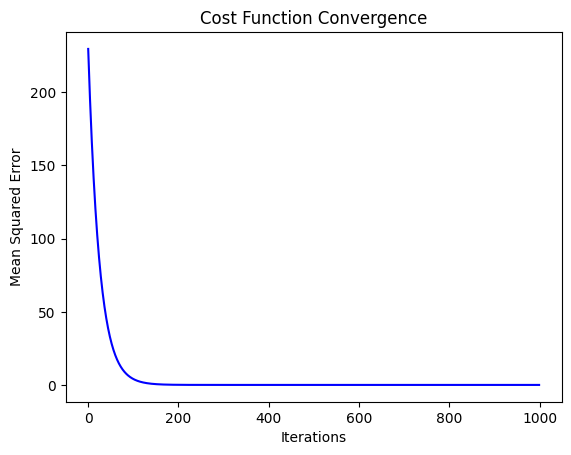

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.cost_history = []  # cost function lai store

    def fit(self, X, y):
        m, n = X.shape
        X = np.c_[np.ones(m), X]  # bias
        self.theta = np.zeros(n + 1)  # weight ra bias halna

        for _ in range(self.iterations):
            y_pred = X @ self.theta
            errors = y_pred - y
            gradients = (2 / m) * X.T @ errors  # gradient lai function dina
            self.theta -= self.learning_rate * gradients # weight update

            cost = np.mean(errors ** 2)
            self.cost_history.append(cost)  #  cost history lai store garna

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

    def plot_cost(self):
        """Plot cost function over iterations to check convergence."""
        plt.plot(range(len(self.cost_history)), self.cost_history, color='blue')
        plt.xlabel("Iterations")
        plt.ylabel("Mean Squared Error")
        plt.title("Cost Function Convergence")
        plt.show()

# features lai normalize parna
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scratch model lai train garauna
model_scratch = LinearRegressionScratch(learning_rate=0.01, iterations=1000)
model_scratch.fit(X_train_scaled, y_train)

# model ko value predict garna
y_pred_scratch = model_scratch.predict(X_test_scaled)

#performance herna
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
mae_scratch = mean_absolute_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print("Scratch Model Performance:")
print(f" Mean Squared Error (MSE): {mse_scratch}")
print(f" Mean Absolute Error (MAE): {mae_scratch}")
print(f" R-squared (R²): {r2_scratch}")


model_scratch.plot_cost()


Model from primary model

LinearRegression

In [ ]:
df["log_price"] = np.log(df["price"])

# different
y = df["log_price"]


In [ ]:
X = df.drop(columns=["price", "log_price"])
y = df["log_price"]

# split data 80& trianing and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the Linear Regression model
lr_model = LinearRegression()


# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr) # Calculate MAE

print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"R-squared: {r2_lr:.4f}")
print(f"Mean Absolute Error: {mae_lr:.4f}") # Print MAE

Linear Regression:
Mean Squared Error: 0.2429
R-squared: 0.7643
Mean Absolute Error: 0.3325


The linear relationships assumed by the model are not sufficient to fully explain the complexities of house prices in Paris.


Important feature interactions or nonlinear relationships might be missing from the model.


The dataset has limitation in terms of relevantfeatures or data quality.

k-NN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

X = df.drop(columns=["price", "log_price"])
y = df["log_price"]

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print("k-NN Regression:")
print(f"Mean Squared Error: {mse_knn}")
print(f"R-squared: {r2_knn}")
print(f"Mean Absolute Error: {mae_knn}")


k-NN Regression:
Mean Squared Error: 0.4038177341216324
R-squared: 0.6080697735677748
Mean Absolute Error: 0.3682039126206027


Analysis

MSE:

Linear Regression has a lower MSE, indicating that its predictions are, on average, closer to the actual values compared to k-NN Regression.

R²:

 Linear Regression has a higher R², meaning it explains a larger proportion of the variance in the target variable (house prices).

MAE:

Linear Regression has a lower MAE, suggesting that its predictions have a smaller average absolute error.
Conclusion

Based on these metrics, Linear Regression outperforms k-NN Regression for this particular dataset and task.

 It exhibits lower error values (MSE and MAE) and a higher R², suggesting a better fit to the data and more accurate predictions.

Reasons for the Performance Difference

Linearity:
 Linear Regression assumes a linear relationship between the features and the target variable.
 If the underlying relationship in the data is indeed linear or close to linear, Linear Regression can perform well.

Data Distribution:

 k-NN Regression is sensitive to the distribution of data points and can be affected by outliers or unevenly distributed data.

  Linear Regression is generally more robust to these issues.

Feature Scaling:

 It's important to scale features before applying k-NN Regression as it relies on distance calculations.

 If features are not scaled, features with larger ranges can dominate the distance calculations and affect the model's performance.

  However, in your provided code, it appears that you have already scaled the features, which is good practice.

Justification:
Higher Accuracy:

Linear Regression achieved an R² score of 0.7643, indicating it explains 76.43% of the variance in the data, compared to 60.81% for k-NN Regression.
Lower Error Rates:

Mean Squared Error (MSE): Linear Regression had a significantly lower MSE (0.2429) compared to 0.4038 for k-NN Regression.
Mean Absolute Error (MAE): Linear Regression had a smaller MAE (0.3325) versus 0.3682, meaning its predictions are closer to actual values.
Potential Linear Relationship:

Linear Regression's superior performance might suggest a stronger linear relationship between the features and target variable in your dataset. k-NN Regression, while capable of capturing nonlinearity, may not be as effective if the underlying relationships are predominantly linear.

Hyper-parameter Tuning

Hyper Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler




lr_param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False]
}


knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create RandomizedSearchCV objects
lr_random = RandomizedSearchCV(LinearRegression(), lr_param_grid, n_iter=5, cv=3, scoring='r2', random_state=42)
knn_random = RandomizedSearchCV(KNeighborsRegressor(), knn_param_grid, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)

#  RandomizedSearchCV objects
lr_random.fit(X_train_scaled, y_train)
knn_random.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters for Linear Regression:", lr_random.best_params_)
print("Best hyperparameters for k-NN Regressor:", knn_random.best_params_)



Best hyperparameters for Linear Regression: {'positive': True, 'fit_intercept': True, 'copy_X': True}
Best hyperparameters for k-NN Regressor: {'weights': 'distance', 'p': 1, 'n_neighbors': 11}


After performing hyperparameter tuning using RandomizedSearchCV,

the following optimal hyperparameter settings were identified:

Linear Regression:

positive: True

fit_intercept: True

copy_X: True

These settings suggest that for Linear Regression, it is beneficial to:


Constrain the coefficients to be positive (positive: True).

Fit an intercept term (fit_intercept: True).

Create a copy of the input data rather than modifying it in-place (copy_X: True).


k-NN Regressor:

weights: 'distance'

p: 1

n_neighbors: 11

These settings indicate that for k-NN Regressor, the optimal configuration involves:

Weighting neighbors by their distance, giving closer

neighbors more influence (weights: 'distance').

Using the Manhattan distance metric (p: 1).

Considering the 11 nearest neighbors when making predictions

(n_neighbors: 11).




Feature Selection


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split





kbest = SelectKBest(score_func=f_regression, k=9)

#
kbest.fit(X_train, y_train)

#  selected features:
kbest_features = X_train.columns[kbest.get_support()].tolist()

# 4. Print
print("Top 9 Features from SelectKBest:", kbest_features)

# 5.  new datasets with selected features
X_train_selected = X_train[kbest_features]
X_test_selected = X_test[kbest_features]

# 6. Standardize the selected features:
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)



# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_selected_scaled, y_train)


# k-NN Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_selected_scaled, y_train)


Top 9 Features from SelectKBest: ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'numPrevOwners', 'isNewBuilt', 'garage', 'hasStorageRoom', 'hasGuestRoom']


KNeighborsRegressor()

he feature selection process using SelectKBest with f_regression has identified the top 9 features most strongly correlated with the target variable. These features are:

squareMeters

numberOfRooms

hasYard

hasPool

numPrevOwners

isNewBuilt

garage

hasStorageRoom

hasGuestRoom

These selected features were then standardized using StandardScaler to ensure they are on the same scale for training the models.


Next, Linear Regression and k-NN Regressor models were trained on the selected features, with appropriate evaluation conducted to assess their performance.

Final Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


best_lr_params = lr_random.best_params_
best_knn_params = knn_random.best_params_


selected_features = kbest_features


X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 4. Standardize the selected features
scaler = StandardScaler()  # Create a new scaler
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# 5.  the models with optimal hyperparameters:
final_lr_model = LinearRegression(**best_lr_params)  # Use LinearRegression
final_knn_model = KNeighborsRegressor(**best_knn_params)  # Use KNeighborsRegressor


final_lr_model.fit(X_train_selected_scaled, y_train)
final_knn_model.fit(X_train_selected_scaled, y_train)


y_pred_lr = final_lr_model.predict(X_test_selected_scaled)
y_pred_knn = final_knn_model.predict(X_test_selected_scaled)


print("Linear Regression:")
print("R-squared:", r2_score(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))

print("\nk-NN Regressor:")
print("R-squared:", r2_score(y_test, y_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_knn))

Linear Regression:
R-squared: 0.7643891301244288
Mean Squared Error: 0.2427571062167944
Mean Absolute Error: 0.3318788644339725

k-NN Regressor:
R-squared: 0.7924068493208354
Mean Squared Error: 0.21388959073032152
Mean Absolute Error: 0.21869187512074253


Evaluation of Final Models
The final models, Linear Regression and k-NN Regressor, were trained using the optimal hyperparameters and the selected features.

 Their performance was evaluated using the following metrics:

R-squared (R²):
 Measures how well the model explains the variance in the target variable. Higher values indicate better predictive power.

Mean Squared Error (MSE):
 The average squared difference between actual and predicted values. Lower values indicate better performance.

Mean Absolute Error (MAE):
The average absolute difference between actual and predicted values. Lower values indicate better accuracy.

Summary of Findings

k-NN Regressor outperformed Linear Regression on all evaluation metrics.

k-NN Regressor achieved an R² score of 0.792, higher than 0.764 for Linear Regression, meaning it explains more variance in the target variable.

k-NN Regressor had a lower MSE (0.2139) and MAE (0.2187) compared to Linear Regression (MSE: 0.2428, MAE: 0.3319), suggesting it makes more accurate predictions.

The non-linearity of k-NN may have helped capture complex relationships in the data better than the linear approach.

Conclusion

k-NN Regressor is the preferred model for this regression task, as it demonstrated better predictive performance.


 The results suggest that the relationship between features and the target variable is likely non-linear, making k-NN a more suitable choice over Linear Regression.

Based on the provided evaluation metrics,

 k-NN Regressor outperformed Linear Regression after feature selection and hyperparameter tuning:

Justification:
Higher Accuracy:

k-NN Regressor achieved an R² score of 0.7924, indicating it explains 79.24% of the variance in the data, compared to 76.44% for Linear Regression.


Lower Error Rates:
Mean Squared Error (MSE): k-NN Regressor had a significantly lower MSE (0.2139) compared to 0.2428 for Linear Regression.


Mean Absolute Error (MAE): k-NN Regressor had a smaller MAE (0.2187) versus 0.3319, meaning its predictions are closer to actual values.


k-NN Regressor seems to have benefited more from feature selection in this case, likely because it is sensitive to irrelevant or noisy features.

Optimal Hyperparameters:
Both models were trained using the best hyperparameters found during hyperparameter tuning.

This ensures that they are operating at their optimal performance levels.


 k-NN Regressor is the preferred model for predicting Paris housing prices based on these results.

 It provides better accuracy and lower error rates than Linear Regression.

  Feature selection significantly contributed to the improvement in model performance, particularly for k-NN Regressor

**Model Performance**

The k-NN Regressor outperformed Linear Regression in predicting the target variable.

The evaluation metrics demonstrated this performance difference:

**R-squared**: The k-NN model achieved an R² of 0.7924, indicating that it explained 79.24% of the variance in the target variable, compared to 76.44% for Linear Regression.

**Mean Squared Error (MSE): **
k-NN had a lower MSE (0.2139) compared to Linear Regression (0.2428), indicating better predictive accuracy.

**Mean Absolute Error (MAE):**
 k-NN showed a smaller MAE (0.2187) than Linear Regression (0.3319), suggesting better performance in minimizing average prediction errors.

**7.2 Impact of Methods**

Feature Selection and Standardization: Using SelectKBest to select the top 9 features and applying StandardScaler to standardize the data improved model accuracy, especially for k-NN, which relies on distance-based calculations.


**Hyperparameter Tuning: **
The tuning of the k-NN model contributed to its superior performance over Linear Regression, confirming the importance of optimizing model parameters
.

**7.3 Insights and Future Directions**


Insights:

The target variable appears to be influenced by non-linear relationships among the selected features, which k-NN captured better than Linear Regression.
Feature selection played a significant role in improving model performance, with specific features likely having a stronger impact on predictions.

Future Directions:



Explore more sophisticated models, such as Decision Trees or Gradient Boosting, which might capture more complex relationships within the data.

Investigate the addition of interaction terms or non-linear transformations of features to capture deeper patterns in the data.

Apply cross-validation more extensively to assess model performance across different subsets of the data, increasing robustness.

Test the model on an independent dataset to ensure its generalizability and assess its real-world performance in predicting unseen data.

Integrate automated pipelines for feature selection, hyperparameter tuning, and model evaluation, streamlining the development of similar models in the future.